In [2]:
#mandate lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#use case
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
data= pd.read_csv('pacific.csv')
data.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137 entries, 0 to 26136
Data columns (total 22 columns):
ID                  26137 non-null object
Name                26137 non-null object
Date                26137 non-null int64
Time                26137 non-null int64
Event               26137 non-null object
Status              26137 non-null object
Latitude            26137 non-null object
Longitude           26137 non-null object
Maximum Wind        26137 non-null int64
Minimum Pressure    26137 non-null int64
Low Wind NE         26137 non-null int64
Low Wind SE         26137 non-null int64
Low Wind SW         26137 non-null int64
Low Wind NW         26137 non-null int64
Moderate Wind NE    26137 non-null int64
Moderate Wind SE    26137 non-null int64
Moderate Wind SW    26137 non-null int64
Moderate Wind NW    26137 non-null int64
High Wind NE        26137 non-null int64
High Wind SE        26137 non-null int64
High Wind SW        26137 non-null int64
High Wind NW        2613

In [5]:
data.describe()

,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,2.613700e+04,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000
mean,1.988908e+07,896.050427,48.949344,18.176225,-745.064851,-746.312125,-748.290929,-746.320542,-751.604622,-752.094923,-752.701917,-752.102957,-753.584382,-753.787160,-754.046945,-753.774534
std,1.688455e+05,672.008065,25.334450,996.896388,447.193480,444.883379,441.232953,444.939111,435.198872,434.303796,433.202389,434.291049,431.605766,431.239618,430.773515,431.263235
min,1.949061e+07,0.000000,10.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1.976081e+07,0.000000,30.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,1.990081e+07,600.000000,45.000000,941.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
75%,2.003092e+07,1200.000000,65.000000,1002.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
max,2.015113e+07,2300.000000,185.000000,1021.000000,300.000000,270.000000,180.000000,1180.000000,150.000000,150.000000,105.000000,150.000000,100.000000,75.000000,75.000000,100.000000


In [7]:
data['Status'].value_counts()

 TS     10076
 TD      6965
 HU      6765
 LO      1828
 DB       217
 ET       152
 EX       110
 SS         7
 PT         6
 ST         6
 SD         4
 HU         1
Name: Status, dtype: int64

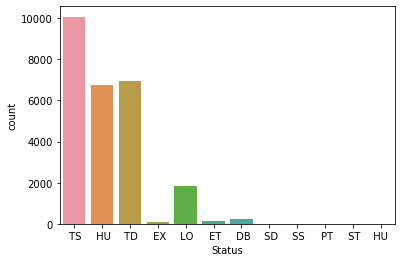

In [8]:
sns.countplot(data.Status)

In [10]:
data.Status = pd.Categorical(data.Status)
type(data.Status)

pandas.core.series.Series

In [11]:
data.Status = data.Status.cat.codes
data.Status.value_counts()

11    10076
10     6965
3      6765
5      1828
0       217
1       152
2       110
8         7
9         6
6         6
7         4
4         1
Name: Status, dtype: int64

In [12]:
data.columns

Index(['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'],
      dtype='object')

In [15]:

pred_columns = data[:]
pred_columns.shape

(26137, 22)

In [22]:
pred_columns.drop(columns = ['Event','ID','Latitude','Longitude','Name','Date','Time'], axis=1, inplace=True)
pred_columns.columns

Index(['Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE',
       'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE',
       'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE',
       'High Wind SW', 'High Wind NW'],
      dtype='object')

In [23]:
prediction_var = pred_columns.columns

In [24]:
train, test = train_test_split(data, test_size=0.25)
print(train.shape, test.shape)

(19602, 22) (6535, 22)


In [27]:
train_x = train[prediction_var]
train_y = train['Status']
test_x = test[prediction_var]
test_y = test['Status']
print(test_x.shape, train_x.shape)

(6535, 14) (19602, 14)


In [43]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)

C:\Users\Harsharaj.raviraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
test_pred = rf.predict(test_x)
train_pred = rf.predict(train_x)

print("Acc for test", metrics.accuracy_score(test_y,test_pred))
print("Acc for train",metrics.accuracy_score(train_y,train_pred))
arr=confusion_matrix(test_y, test_pred)
df=pd.DataFrame(arr)
print("Testing Confusion matrix\n",df)

Acc for test 0.9554705432287681
Acc for train 0.9602591572288542
Testing Confusion matrix
    0  1  2     3    4  5  6  7     8     9
0  1  0  0     0   54  0  0  0     5     0
1  0  0  0     3    0  0  0  0    31     5
2  0  0  2     4    1  0  0  0    12     8
3  0  0  0  1731    0  0  0  0     0     0
4  3  0  0     0  395  0  0  0    72     9
5  0  0  0     0    0  1  0  0     1     0
6  0  0  0     0    0  0  0  0     2     0
7  0  0  0     0    0  0  0  2     0     0
8  0  0  1     0   77  0  0  0  1670     1
9  0  0  0     0    1  1  0  0     0  2442


In [51]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(train_x,train_y)# now fit our model for traiing data
test_pred=model.predict(test_x)# predict for the test data
train_pred=model.predict(train_x)# predict for the test data
print('Training Accuracy of DT is {}'.format(metrics.accuracy_score(train_pred,train_y))) # to check the accuracy
print('Testing Accuracy of DT is {}'.format(metrics.accuracy_score(test_pred,test_y))) # to check the accuracy

arr=confusion_matrix(test_y, test_pred)
df=pd.DataFrame(arr)
print("Testing Confusion matrix\n",df)

Training Accuracy of DT is 0.9604632180389756
Testing Accuracy of DT is 0.9547054322876817
Testing Confusion matrix
     0  1  2     3  4    5  6  7  8     9    10
0   0  0  0     0  0   55  0  0  0     5     0
1   0  0  0     3  0    0  0  0  0    31     5
2   0  0  2     4  0    2  0  0  0    12     7
3   0  0  0  1730  1    0  0  0  0     0     0
4   0  0  0     0  0    0  0  0  0     0     0
5   2  0  0     0  0  398  0  0  0    72     7
6   0  0  0     0  0    0  1  0  0     1     0
7   0  0  0     0  0    0  0  0  0     2     0
8   0  0  0     0  0    0  0  0  2     0     0
9   0  0  0     0  0   77  0  0  0  1671     1
10  0  0  0     0  0    7  1  0  1     0  2435
